# Importing Library

In [2]:
#Loading Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image 

# /Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/digits/Digits

# Loading Data

In [3]:
# loading data
data = os.listdir('/Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/digits/Digits')
data_X = []
data_y = []
data_class = len(data)
for i in range(0, data_class):
    data_list = os.listdir('/Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/digits/Digits/' + "/"+str(i))
    for j in data_list:
        pic = cv2.imread('/Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/digits/Digits/' + "/"+str(i)+"/"+j)
        pic = cv2.resize(pic, (32, 32))
        data_X.append(pic)
        data_y.append(i)

if len(data_X) == len(data_y):
    print("Total Datapotins: ", len(data_X))

# labels and image
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Datapotins:  10160


# Spliting Dataset

In [5]:
# Splitting the train validation and test data
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.05)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print("Train data: ", X_train.shape)
print("Validation data: ", X_val.shape)
print("Test data: ", X_test.shape)


Train data:  (7721, 32, 32, 3)
Validation data:  (1931, 32, 32, 3)
Test data:  (508, 32, 32, 3)


In [6]:
# preprocessing the images for neural network

def Prep(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

X_train = np.array(list(map(Prep, X_train)))
X_val = np.array(list(map(Prep, X_val)))
X_test = np.array(list(map(Prep, X_test)))

# Reshaping the images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# augmenting the images
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(X_train)

In [7]:
# One hot encoding of the labels
y_train = to_categorical(y_train, data_class)
y_val = to_categorical(y_val, data_class)
y_test = to_categorical(y_test, data_class)

# Model Building

In [47]:
# creating the model

model = Sequential()

model.add((Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu', padding='same')))
model.add((Conv2D(60, (5, 5), activation='relu', padding='same')))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add((Conv2D(30, (3, 3), activation='relu', padding='same')))
model.add((Conv2D(30, (3, 3), activation='relu', padding='same')))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 60)        1560      
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 60)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                  

In [48]:
# compiling the model
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# fitting the model
history = model.fit(datagen.flow(X_train, y_train, 
                                batch_size=32), 
                                epochs=5, 
                                validation_data=(X_val, y_val), 
                                verbose=2,
                                steps_per_epoch=200)

Epoch 1/5
200/200 - 54s - loss: 0.9760 - accuracy: 0.6668 - val_loss: 0.0820 - val_accuracy: 0.9741 - 54s/epoch - 272ms/step
Epoch 2/5
200/200 - 52s - loss: 0.2792 - accuracy: 0.9111 - val_loss: 0.0338 - val_accuracy: 0.9902 - 52s/epoch - 259ms/step
Epoch 3/5
200/200 - 54s - loss: 0.1942 - accuracy: 0.9351 - val_loss: 0.0284 - val_accuracy: 0.9917 - 54s/epoch - 270ms/step
Epoch 4/5
200/200 - 55s - loss: 0.1484 - accuracy: 0.9556 - val_loss: 0.0631 - val_accuracy: 0.9834 - 55s/epoch - 277ms/step
Epoch 5/5
200/200 - 57s - loss: 0.1399 - accuracy: 0.9566 - val_loss: 0.0225 - val_accuracy: 0.9922 - 57s/epoch - 283ms/step


In [49]:
# testing the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])


Test Score:  0.011588828638195992
Test Accuracy:  0.9940944910049438


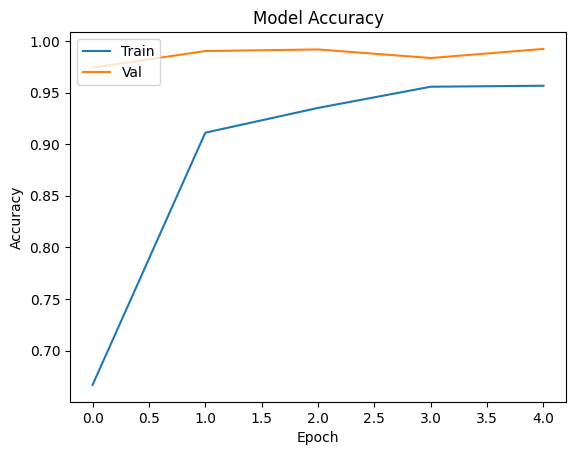

In [50]:
# save the model
model.save('modelkedua.h5')

# plot the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Reading Sudoku Puzzer

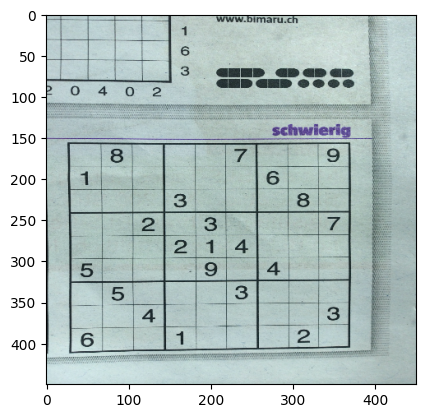

In [52]:
# randomly select an image from dataset

folder = '/Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/datasetsudoku'
a = random.choice(os.listdir(folder))
sudoku_a = cv2.imread(folder + "/" + a)
sudoku_a = cv2.resize(sudoku_a, (450, 450))
plt.figure()
plt.imshow(sudoku_a)
plt.show()

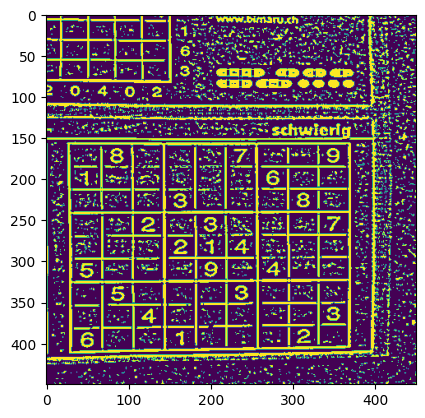

In [22]:
# preprocessing the image
sodoku_a = cv2.resize(sudoku_a, (450, 450))

# function preprocess to grayscale and thresholding
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3, 3), 6)
    thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
    return thresh

thresh = preprocess(sodoku_a)

plt.figure()
plt.imshow(thresh)
plt.show()


# Contour Detection & Detect Sudoku

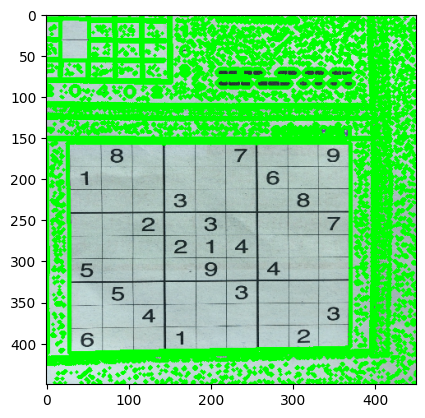

In [23]:
# finding outlines of the sudoku

contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contours, -1, (0, 255, 0), 3)
plt.figure()
plt.imshow(contour_1)
plt.show()


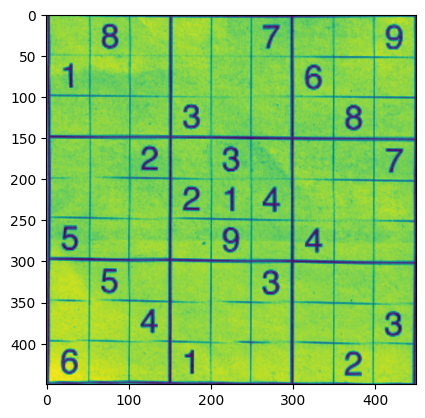

In [26]:
def main_outline(contours):
    main = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                main = approx
                max_area = area
    return main, max_area

def reframe(points):
    points = points.reshape((4, 2))
    new_points = np.zeros((4, 1, 2), dtype=np.int32)
    add = points.sum(1)
    new_points[0] = points[np.argmin(add)]
    new_points[3] = points[np.argmax(add)]
    diff = np.diff(points, axis=1)
    new_points[1] = points[np.argmin(diff)]
    new_points[2] = points[np.argmax(diff)]
    return new_points

black_img = np.zeros((450, 450, 3), np.uint8)
main, max_area = main_outline(contours)
if main.size != 0:
    main = reframe(main)
    cv2.drawContours(black_img, [main], -1, (0, 255, 0), 25)
    pts1 = np.float32(main)
    pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp_colored = cv2.warpPerspective(sudoku_a, matrix, (450, 450))
    img_warp_colored = cv2.cvtColor(img_warp_colored, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.imshow(img_warp_colored)
    plt.show()
    plt.imsave('sudoku.jpg', img_warp_colored, cmap='gray')

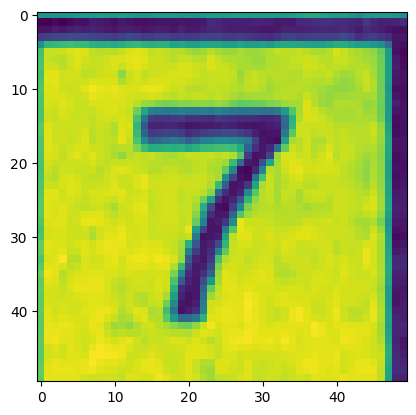

In [37]:
sudoku_cell = splitcells(img_warp_colored)
plt.figure()
plt.imshow(sudoku_cell[5])
plt.show()

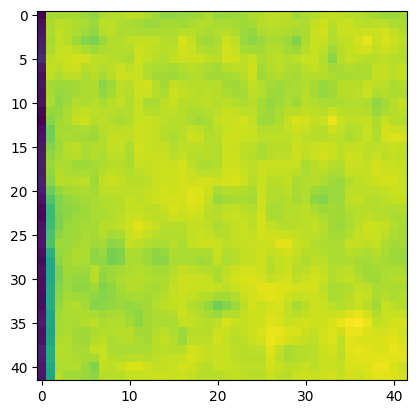

In [40]:
def CropCell(cells):
    cropped_cells = []
    for image in cells:
        img = np.array(image)
        img = img[4:46, 4:46]
        img = Image.fromarray(img)
        cropped_cells.append(img)
    return cropped_cells

sudoku_cell_croped = CropCell(sudoku_cell)
plt.figure()
plt.imshow(sudoku_cell_croped[0])
plt.show()

In [66]:
def read_cells(cell, model):
    result = []
    for image in cell:
        img = np.array(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] - 4]
        img = cv2.resize(img, (32, 32))
        # img = img.reshape(1, 42, 42, 1)
        # img = img.astype('float32')
        img = img / 255
        img = img.reshape(1, 32, 32, 1)

        prediction = model.predict(img)
        classIndex = np.argmax(prediction, axis=1)
        probabilityValue = np.amax(prediction)
        if probabilityValue > 0.65:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asanyarray(grid)

1/1 [==============================] - 0s 24ms/step


# Solving

In [58]:
# reshape the grid to 9x9 matrix
grid = grid.reshape(9, 9)
print(grid)

[[0 8 0 0 0 7 0 0 9]
 [1 0 0 0 0 0 6 0 0]
 [0 0 0 3 0 0 0 8 0]
 [0 0 2 0 3 0 0 0 7]
 [0 0 0 2 1 4 0 0 0]
 [5 0 0 0 9 0 4 0 0]
 [0 5 0 0 0 3 0 0 0]
 [0 0 4 0 0 0 0 0 3]
 [6 0 0 1 0 0 0 2 0]]


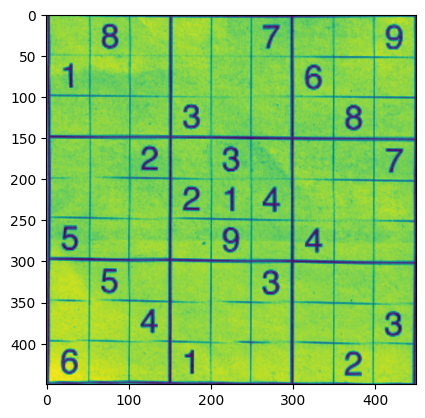

In [59]:
# for comparison
plt.figure()
plt.imshow(img_warp_colored)
plt.show()

In [60]:
# function to solve the sudoku

def next_box(quiz):
    for r in range(9):
        for c in range(9):
            if quiz[r][c] == 0:
                return r, c
    return False

# function to fill in the possible numbers in the box

def possible(quiz, row, col, num):
    # check row
    for i in range(9):
        if quiz[row][i] == num and row != i:
            return False
    # check column
    for i in range(9):
        if quiz[i][col] == num and col != i:
            return False
    # check 3x3 box
    row_start = (row // 3) * 3
    col_start = (col // 3) * 3
    for r in range(row_start, row_start + 3):
        for c in range(col_start, col_start + 3):
            if quiz[r][c] == num and (r, c) != (row, col):
                return False
    return True

# recursive function to solve the sudoku
def solve(quiz):
    find = next_box(quiz)
    if not find:
        return True
    else:
        row, col = find
        for i in range(1, 10):
            if possible(quiz, row, col, i):
                quiz[row][col] = i
                if solve(quiz):
                    return True
                quiz[row][col] = 0
    return False


def Solved(quiz):
    solved = np.zeros((9, 9), dtype=int)
    for i in range(9):
        for j in range(9):
            solved[i][j] = quiz[i][j]
    return solved

In [61]:
solve(grid)

True

In [62]:
Solved(grid)

array([[2, 8, 5, 4, 1, 7, 2, 3, 9],
       [1, 3, 7, 8, 2, 9, 6, 4, 5],
       [4, 9, 6, 3, 5, 6, 7, 8, 1],
       [8, 4, 2, 6, 3, 5, 9, 6, 7],
       [9, 7, 1, 2, 1, 4, 3, 5, 8],
       [5, 6, 3, 7, 9, 8, 4, 1, 2],
       [2, 5, 8, 9, 4, 3, 1, 7, 6],
       [7, 1, 4, 5, 6, 2, 8, 9, 3],
       [6, 3, 9, 1, 7, 8, 5, 2, 4]])

In [64]:
model = tf.keras.models.load_model('modelkedua.h5')


In [65]:
Solved(grid)

array([[2, 8, 5, 4, 1, 7, 2, 3, 9],
       [1, 3, 7, 8, 2, 9, 6, 4, 5],
       [4, 9, 6, 3, 5, 6, 7, 8, 1],
       [8, 4, 2, 6, 3, 5, 9, 6, 7],
       [9, 7, 1, 2, 1, 4, 3, 5, 8],
       [5, 6, 3, 7, 9, 8, 4, 1, 2],
       [2, 5, 8, 9, 4, 3, 1, 7, 6],
       [7, 1, 4, 5, 6, 2, 8, 9, 3],
       [6, 3, 9, 1, 7, 8, 5, 2, 4]])